In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statistics as st
import plotly.express as px

In [3]:
data = pd.read_csv("../dataset/dataset_clean.csv")

In [4]:
data=data.drop(columns='Index')
data.head(10)

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Time_taken_(min),Distance,Hour_order,Session,WeekDay
0,36.0,4.5,23.351058,85.325731,23.371058,85.345731,2022-03-24 11:25:00,2022-03-24 11:35:00,Cloudy,High,...,Drinks,motorcycle,1.0,No,Metropolitian,25.0,3.018911,11.0,Morning,3.0
1,37.0,4.7,12.934365,77.616155,13.024365,77.706155,2022-03-25 17:40:00,2022-03-25 17:50:00,Fog,Medium,...,Meal,scooter,1.0,No,Metropolitian,40.0,13.973178,17.0,Afternoon,4.0
2,25.0,4.9,22.312790,73.170283,22.352790,73.210283,2022-03-19 13:40:00,2022-03-19 13:55:00,Cloudy,High,...,Drinks,scooter,1.0,No,Urban,30.0,6.058825,13.0,Afternoon,5.0
3,28.0,4.5,17.433809,78.386744,17.563809,78.516744,2022-03-10 23:35:00,2022-03-10 23:45:00,Sandstorms,Low,...,Drinks,motorcycle,1.0,No,Metropolitian,11.0,19.975520,23.0,Night,3.0
4,22.0,4.5,12.310972,76.659264,12.390972,76.739264,2022-03-10 20:40:00,2022-03-10 20:55:00,Fog,Jam,...,Snack,motorcycle,1.0,No,Metropolitian,47.0,12.435540,20.0,Night,3.0
5,37.0,4.8,19.091458,72.827808,19.101458,72.837808,2022-04-03 10:45:00,2022-04-03 10:50:00,Sunny,Low,...,Meal,scooter,1.0,No,Urban,19.0,1.529877,10.0,Morning,6.0
6,21.0,4.8,23.234249,77.434007,23.244249,77.444007,2022-02-15 09:40:00,2022-02-15 09:45:00,Windy,Low,...,Snack,scooter,1.0,No,Metropolitian,15.0,1.510088,9.0,Morning,1.0
7,35.0,4.2,15.303897,73.914336,15.323897,73.934336,2022-02-13 08:30:00,2022-02-13 08:35:00,Windy,Low,...,Snack,motorcycle,1.0,No,Metropolitian,31.0,3.089737,8.0,Morning,6.0
8,34.0,4.5,22.514688,88.393294,22.564688,88.443294,2022-02-11 18:35:00,2022-02-11 18:40:00,Fog,Medium,...,Drinks,scooter,1.0,No,Urban,18.0,7.568330,18.0,Night,4.0
9,22.0,5.0,26.911927,75.797282,26.931927,75.817282,2022-04-01 08:20:00,2022-04-01 08:35:00,Fog,Low,...,Buffet,motorcycle,1.0,No,Metropolitian,20.0,2.979521,8.0,Morning,4.0


In [5]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Delivery_person_Age : [36. 37. 25. 28. 22. 21. 35. 34. 39. 33. 38. 27. 26. 31. 30. 32. 24. 29.
 23. 20.]
Delivery_person_ratings : [4.5 4.7 4.9 4.8 4.2 5.  4.6 4.4 3.7 3.8 4.  4.3 4.1 3.9 3.6 3.5 2.9 3.3
 2.6 3.2 2.5 3.4 3.1 2.7 2.8 3. ]
Restaurant_latitude : [23.351058 12.934365 22.31279  17.433809 12.310972 19.091458 23.234249
 15.303897 22.514688 26.911927 13.064181 22.753659 19.874449 22.308096
 12.284747 13.049645 19.131141 22.761226 26.892312 27.160934 11.006686
 17.431477 13.045479 26.47775  17.422819 26.492106 21.173343 22.727021
 22.725748 23.357804 23.353783 18.530963 22.552996 12.914264 21.170798
 12.972532 15.496162 11.024839 22.311358 22.311603 26.473698 26.90519
 17.45971  19.055831 22.75004  26.471617 11.022169 23.371292 12.323194
 22.751857 19.003517 17.430448 12.352058  9.985497 19.221315 13.091809
 22.539129 13.086438 18.994049 12.334022 13.026286 22.307898 10.96185
  9.982834 21.157729 22.761593 26.463504 26.913483 12.299524 12.972793
 23.39925  12.98041  21.17106  2

In [6]:
data['Vehicle_condition'] = data['Vehicle_condition'].astype(object)

In [7]:
data.dtypes

Delivery_person_Age            float64
Delivery_person_ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_order                      object
Time_order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition               object
Type_of_order                   object
Type_of_vehicle                 object
Multiple_deliveries            float64
Festival                        object
City                            object
Time_taken_(min)               float64
Distance                       float64
Hour_order                     float64
Session                         object
WeekDay                        float64
dtype: object

In [8]:
# Examine numerical features in the dataset
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Multiple_deliveries',
       'Time_taken_(min)', 'Distance', 'Hour_order', 'WeekDay'],
      dtype='object')

In [9]:
# Examine categorical features in the dataset
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Session'],
      dtype='object')

# Descriptive statistics (Thống kê mô tả)

Central tendencies (Hướng trung tâm):

In [10]:
#  Get various summary statistics that exclude NaN values
data[numeric_features.columns].describe()

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Multiple_deliveries,Time_taken_(min),Distance,Hour_order,WeekDay
count,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40085.000000,40054.000000,40054.000000
mean,29.589847,4.634936,18.901124,76.909354,18.964698,76.972928,1.057528,26.235624,9.706366,17.414840,2.996605
std,5.780344,0.313627,5.461323,3.492724,5.463141,3.492953,0.260559,9.285576,5.597893,4.820942,1.970493
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,1.000000,10.000000,1.465067,0.000000,0.000000
25%,25.000000,4.500000,12.986047,73.897902,13.065801,73.938972,1.000000,19.000000,4.657652,15.000000,1.000000
50%,30.000000,4.700000,19.065838,76.618203,19.119300,76.661094,1.000000,26.000000,9.192881,19.000000,3.000000
75%,35.000000,4.900000,22.751234,78.347554,22.817021,78.399645,1.000000,32.000000,13.631344,21.000000,5.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,54.000000,20.969489,23.000000,6.000000


In [11]:
print("Calculate mode value of features:")
for feature in data.columns:
    mode=st.mode(data[feature])
    print(f'{feature}:', mode)

Calculate mode value of features:
Delivery_person_Age: 38.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 26.911378
Restaurant_longitude: 75.789034
Delivery_location_latitude: 26.923483
Delivery_location_longitude: 75.813139
Time_order: 2022-03-20 20:15:00
Time_order_picked: 2022-03-29 23:55:00
Weather_conditions: Fog
Road_traffic_density: Low
Vehicle_condition: 1
Type_of_order: Snack
Type_of_vehicle: motorcycle
Multiple_deliveries: 1.0
Festival: No
City: Metropolitian
Time_taken_(min): 26.0
Distance: 1.4897806661060058
Hour_order: 21.0
Session: Night
WeekDay: 2.0


In [12]:
print("Calculate median value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].median())

Calculate median value of numerical features:
Delivery_person_Age: 30.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 19.065838
Restaurant_longitude: 76.618203
Delivery_location_latitude: 19.1193
Delivery_location_longitude: 76.661094
Multiple_deliveries: 1.0
Time_taken_(min): 26.0
Distance: 9.192881348719856
Hour_order: 19.0
WeekDay: 3.0


In [13]:
print("Calculate mean value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].mean())

Calculate mean value of numerical features:
Delivery_person_Age: 29.589846576025945
Delivery_person_ratings: 4.6349357615067985
Restaurant_latitude: 18.901123974005237
Restaurant_longitude: 76.90935447244604
Delivery_location_latitude: 18.96469763253087
Delivery_location_longitude: 76.9729281299239
Multiple_deliveries: 1.057527753523762
Time_taken_(min): 26.235624298365973
Distance: 9.706366024105543
Hour_order: 17.41483996604584
WeekDay: 2.996604583811854


Dispersion (Độ phân tán):

In [14]:
print("Standard deviation (Độ lệch chuẩn):")
data.std(numeric_only=True)

Standard deviation (Độ lệch chuẩn):


Delivery_person_Age            5.780344
Delivery_person_ratings        0.313627
Restaurant_latitude            5.461323
Restaurant_longitude           3.492724
Delivery_location_latitude     5.463141
Delivery_location_longitude    3.492953
Multiple_deliveries            0.260559
Time_taken_(min)               9.285576
Distance                       5.597893
Hour_order                     4.820942
WeekDay                        1.970493
dtype: float64

In [15]:
print("Variance (Phương sai):")
data.var(numeric_only=True)

Variance (Phương sai):


Delivery_person_Age            33.412376
Delivery_person_ratings         0.098362
Restaurant_latitude            29.826044
Restaurant_longitude           12.199122
Delivery_location_latitude     29.845915
Delivery_location_longitude    12.200718
Multiple_deliveries             0.067891
Time_taken_(min)               86.221922
Distance                       31.336405
Hour_order                     23.241481
WeekDay                         3.882844
dtype: float64

# Shape of data

In [16]:
data.skew(numeric_only=True)

Delivery_person_Age           -0.018391
Delivery_person_ratings       -1.801622
Restaurant_latitude            0.106566
Restaurant_longitude           1.193529
Delivery_location_latitude     0.107277
Delivery_location_longitude    1.192807
Multiple_deliveries            4.897803
Time_taken_(min)               0.461690
Distance                       0.326934
Hour_order                    -1.022171
WeekDay                        0.004569
dtype: float64

In [17]:
data.kurt(numeric_only=True)

Delivery_person_Age            -1.217388
Delivery_person_ratings         5.181138
Restaurant_latitude            -1.000492
Restaurant_longitude            1.464813
Delivery_location_latitude     -0.999767
Delivery_location_longitude     1.463240
Multiple_deliveries            25.628084
Time_taken_(min)               -0.343208
Distance                       -0.901332
Hour_order                      0.457015
WeekDay                        -1.215657
dtype: float64

In [18]:
def plot_skewness_kutosis(feature):
    g = sns.displot(data=data, x=feature, kind='kde', color='darkred')
    for ax in g.axes.ravel():
        ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data[feature].skew(), fontsize=10, verticalalignment='top', horizontalalignment='right')
        ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data[feature].kurt(), fontsize=10, verticalalignment='top', horizontalalignment='right')

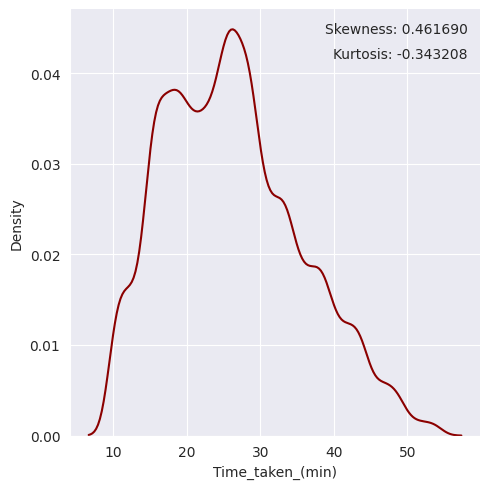

In [19]:
plot_skewness_kutosis('Time_taken_(min)')

In [20]:
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Multiple_deliveries',
       'Time_taken_(min)', 'Distance', 'Hour_order', 'WeekDay'],
      dtype='object')

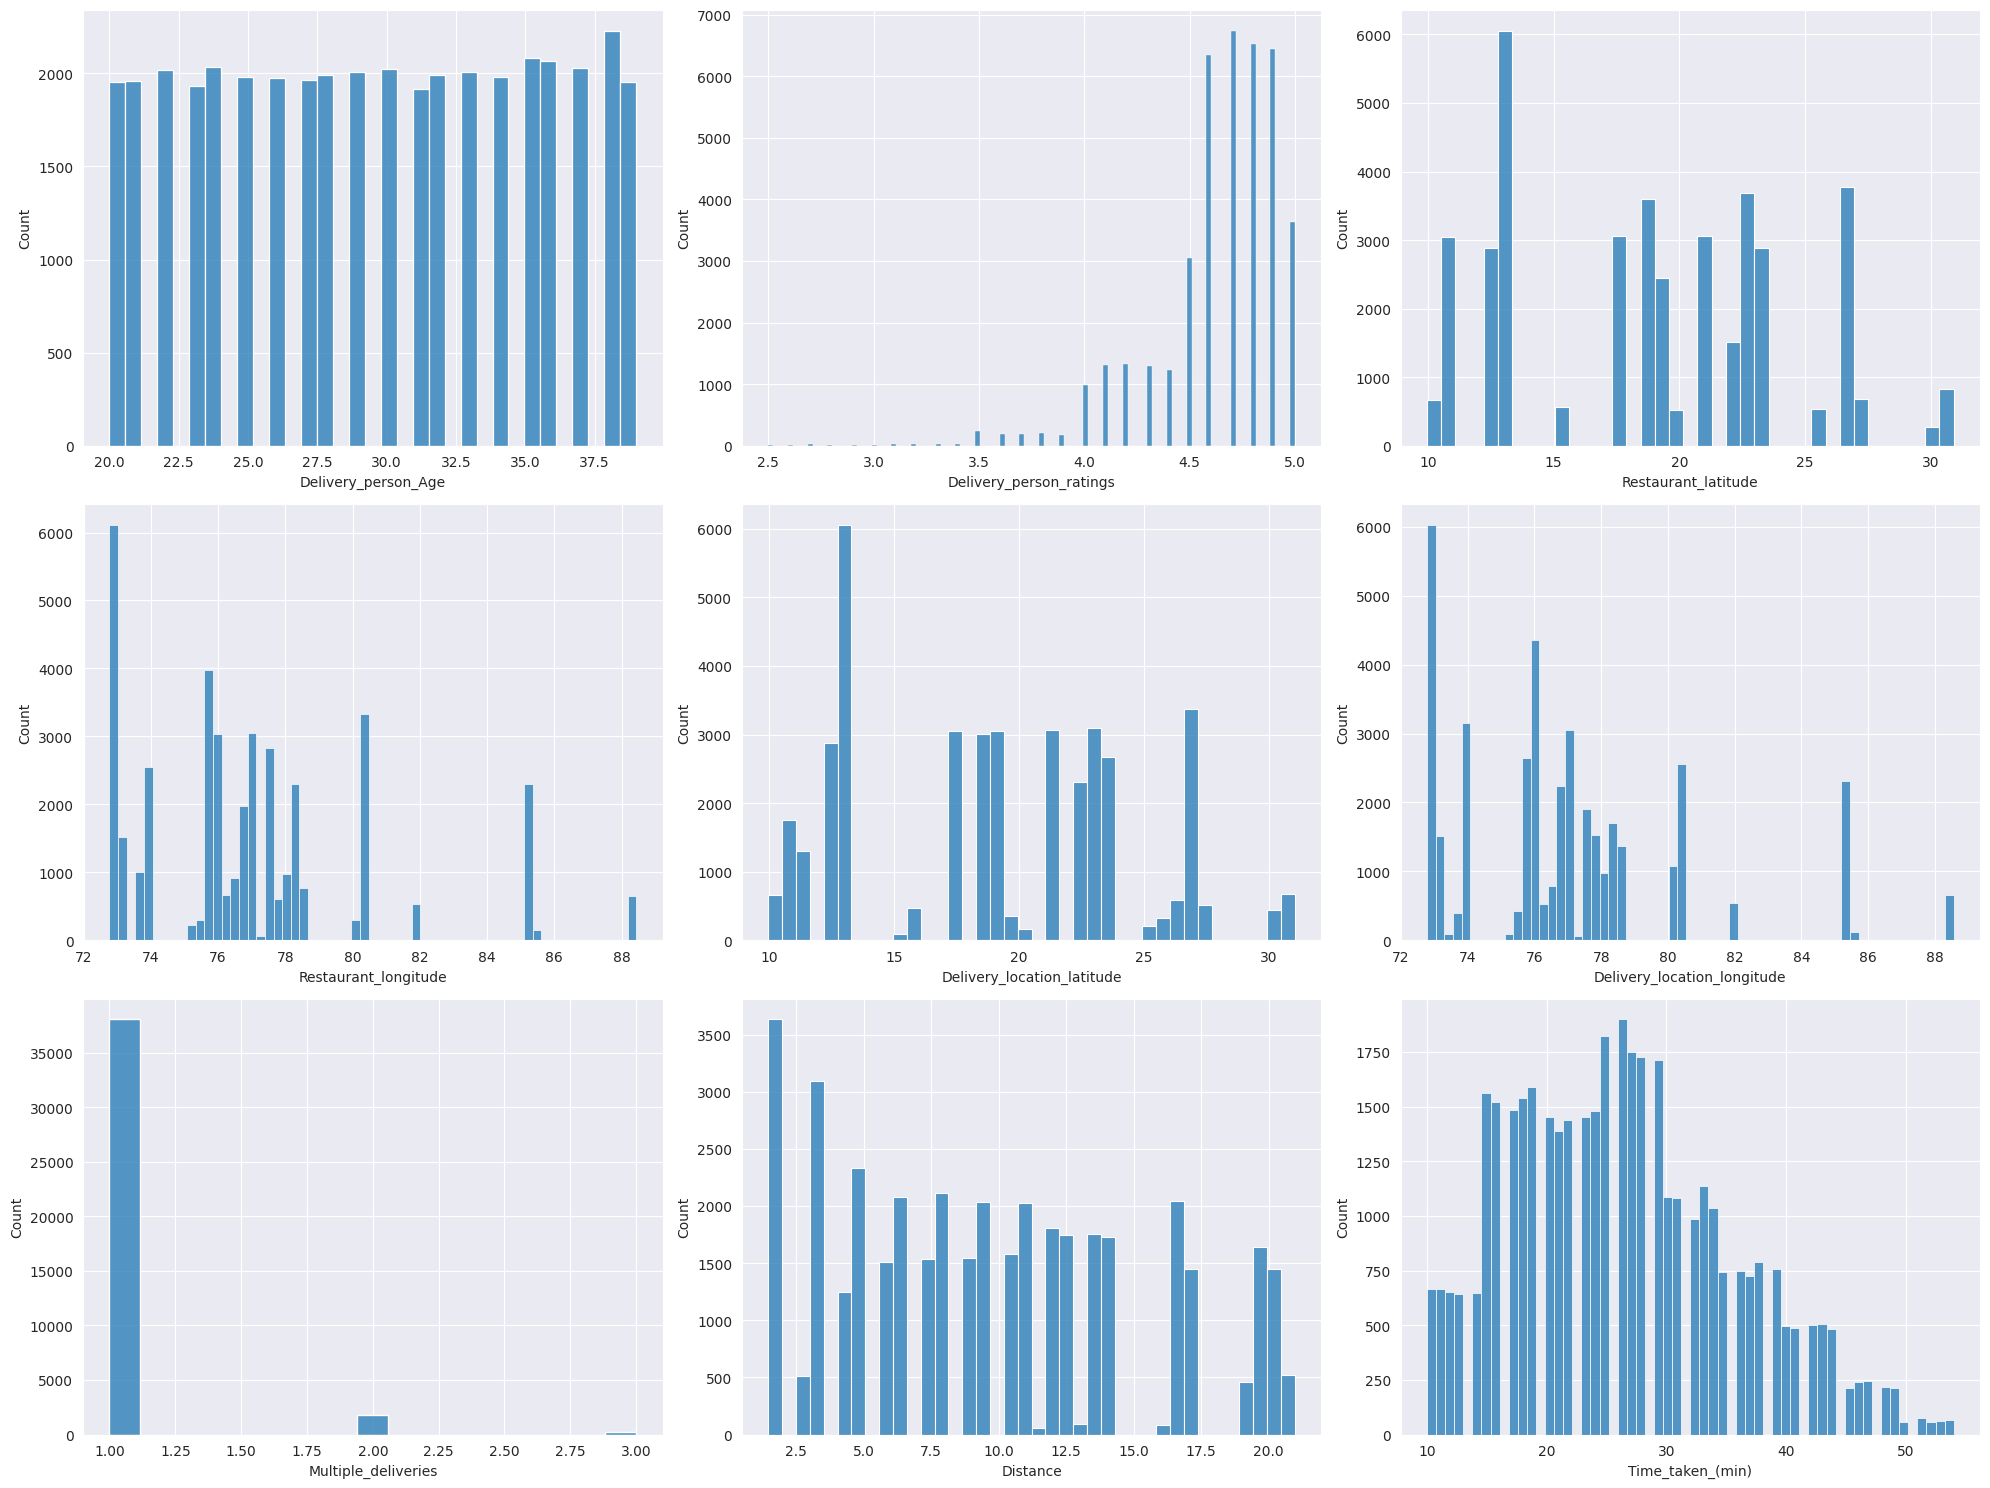

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.histplot(data = data, x = 'Delivery_person_Age', ax=axes[0, 0])
sns.histplot(data = data, x = 'Delivery_person_ratings', ax=axes[0, 1])
sns.histplot(data = data, x = 'Restaurant_latitude', ax=axes[0, 2])
sns.histplot(data = data, x = 'Restaurant_longitude', ax=axes[1, 0])
sns.histplot(data = data, x = 'Delivery_location_latitude', ax=axes[1, 1])
sns.histplot(data = data, x = 'Delivery_location_longitude', ax=axes[1, 2])
sns.histplot(data = data, x = 'Multiple_deliveries', ax=axes[2, 0])
sns.histplot(data = data, x = 'Distance', ax=axes[2, 1])
sns.histplot(data = data, x = 'Time_taken_(min)', ax=axes[2, 2])
plt.tight_layout()
plt.show()

In [22]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Session'],
      dtype='object')

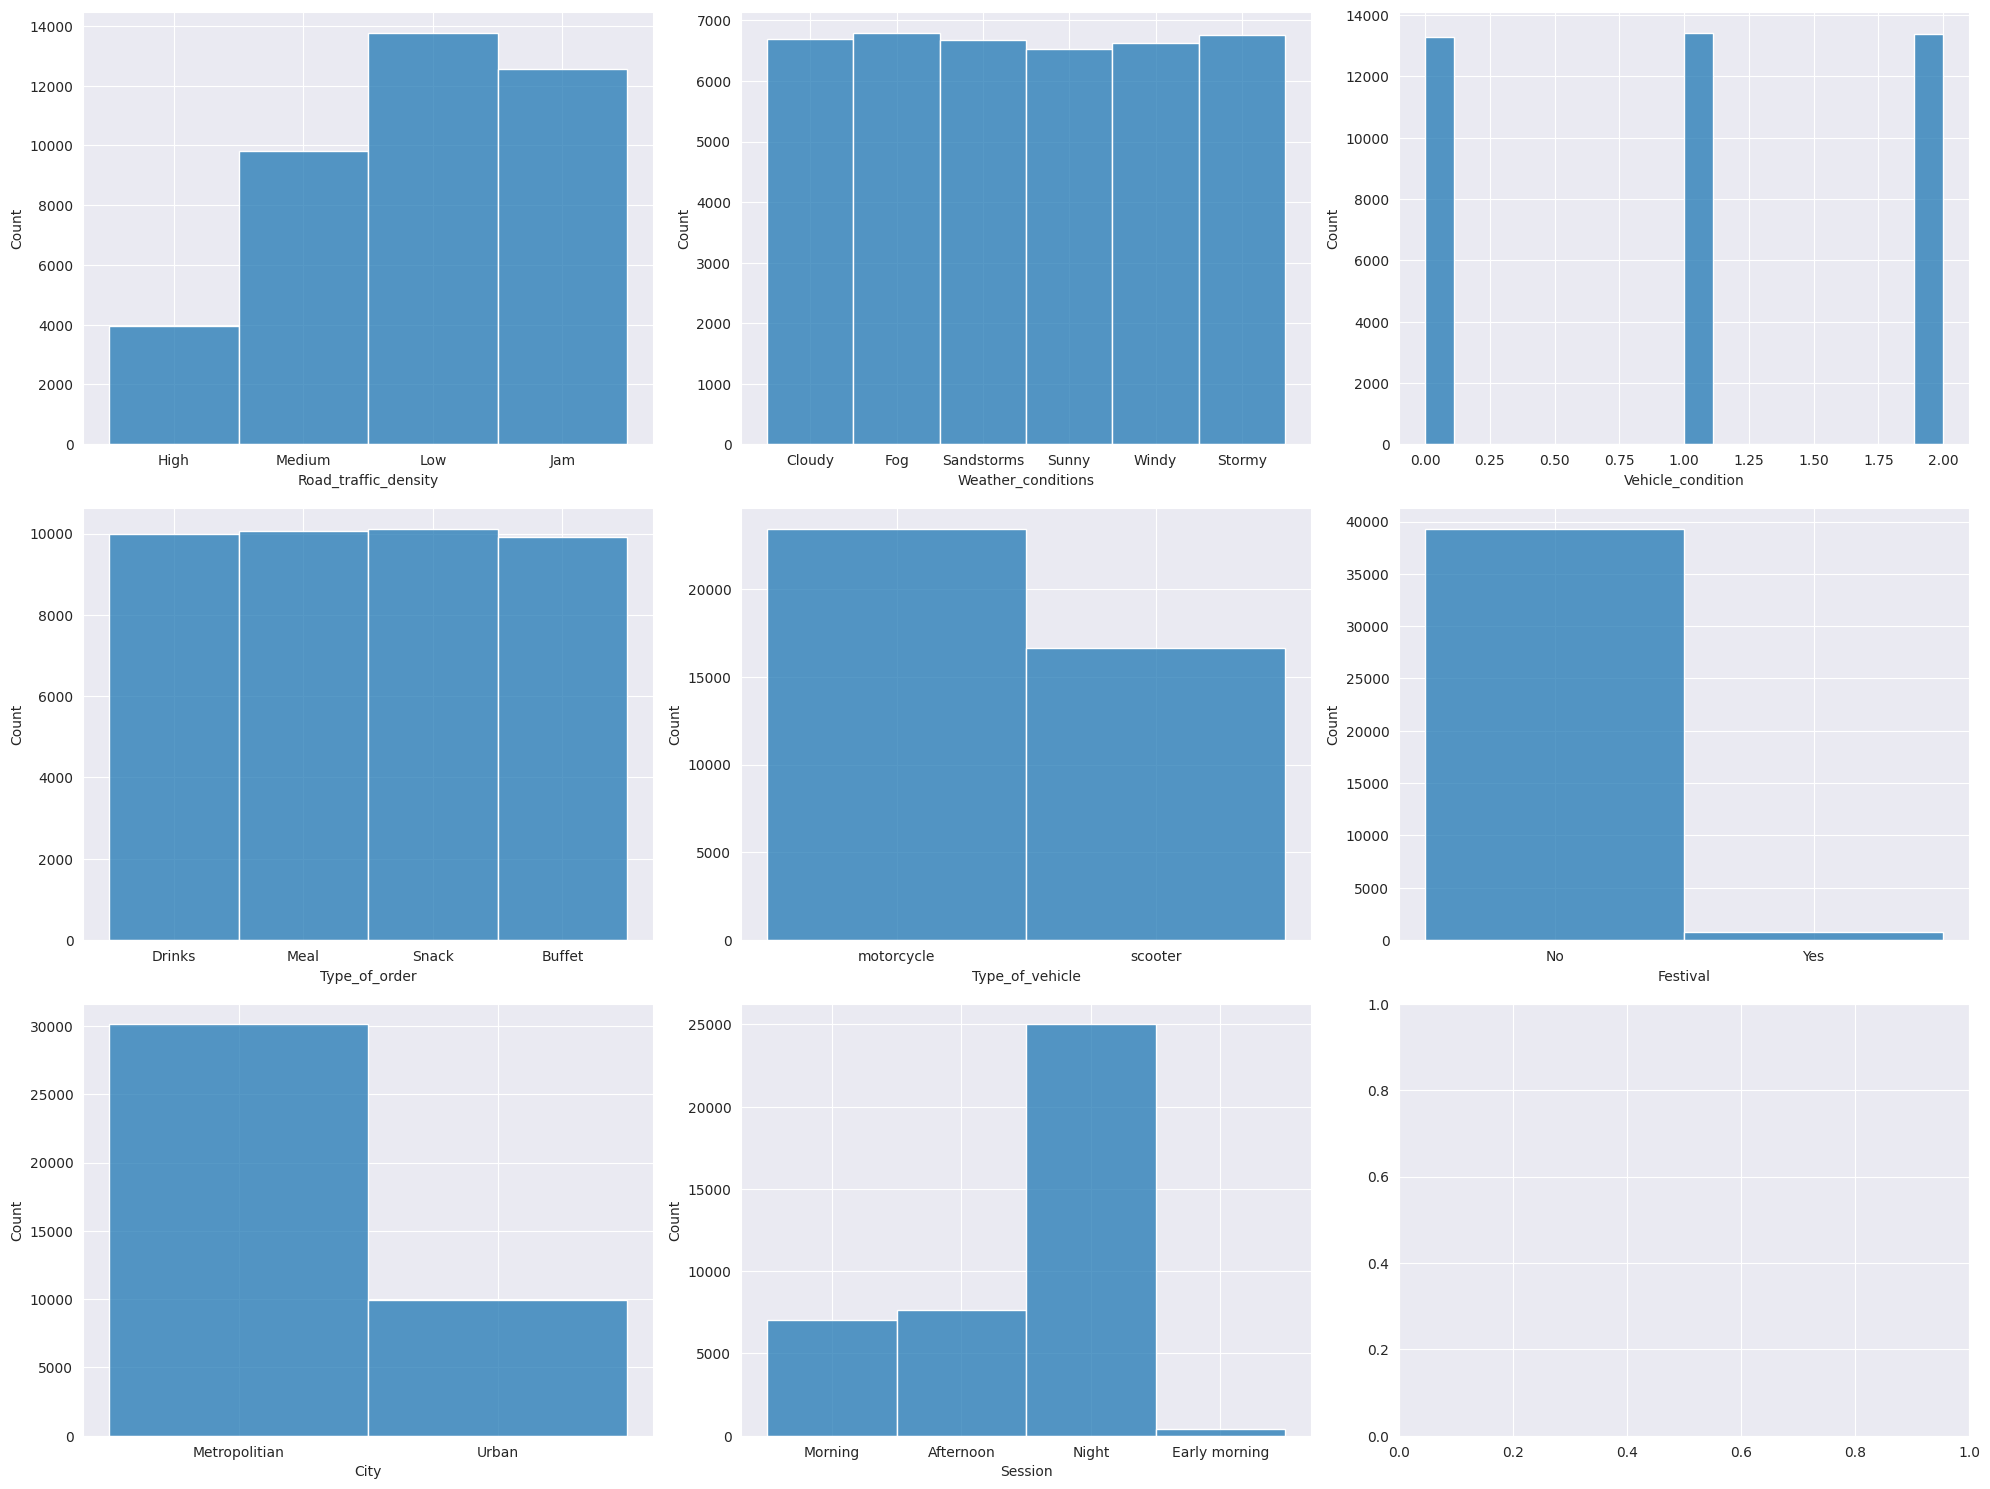

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.histplot(data = data, x = 'Road_traffic_density', ax=axes[0, 0])
sns.histplot(data = data, x = 'Weather_conditions', ax=axes[0, 1])
sns.histplot(data = data, x = 'Vehicle_condition', ax=axes[0, 2])
sns.histplot(data = data, x = 'Type_of_order', ax=axes[1, 0])
sns.histplot(data = data, x = 'Type_of_vehicle', ax=axes[1, 1])
sns.histplot(data = data, x = 'Festival', ax=axes[1, 2])
sns.histplot(data = data, x = 'City', ax=axes[2, 0])
sns.histplot(data = data, x = 'Session', ax=axes[2, 1])
plt.tight_layout()
plt.show()

In [24]:
numeric_features

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Multiple_deliveries,Time_taken_(min),Distance,Hour_order,WeekDay
0,36.0,4.5,23.351058,85.325731,23.371058,85.345731,1.0,25.0,3.018911,11.0,3.0
1,37.0,4.7,12.934365,77.616155,13.024365,77.706155,1.0,40.0,13.973178,17.0,4.0
2,25.0,4.9,22.312790,73.170283,22.352790,73.210283,1.0,30.0,6.058825,13.0,5.0
3,28.0,4.5,17.433809,78.386744,17.563809,78.516744,1.0,11.0,19.975520,23.0,3.0
4,22.0,4.5,12.310972,76.659264,12.390972,76.739264,1.0,47.0,12.435540,20.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
40080,26.0,4.8,30.899992,75.831338,30.909992,75.841338,1.0,21.0,1.465159,10.0,4.0
40081,28.0,4.7,26.891191,75.802083,26.911191,75.822083,1.0,18.0,2.979763,9.0,1.0
40082,30.0,3.8,15.561295,73.749478,15.651295,73.839478,1.0,35.0,13.894367,23.0,5.0
40083,20.0,4.7,26.477750,80.351569,26.547750,80.421569,1.0,18.0,10.444972,23.0,4.0


In [48]:
import folium

locations = data[['Restaurant_latitude', "Restaurant_longitude"]]

<AxesSubplot: >

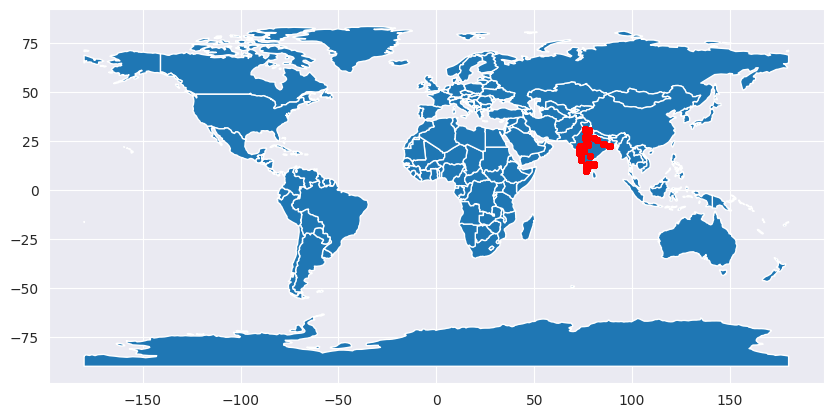

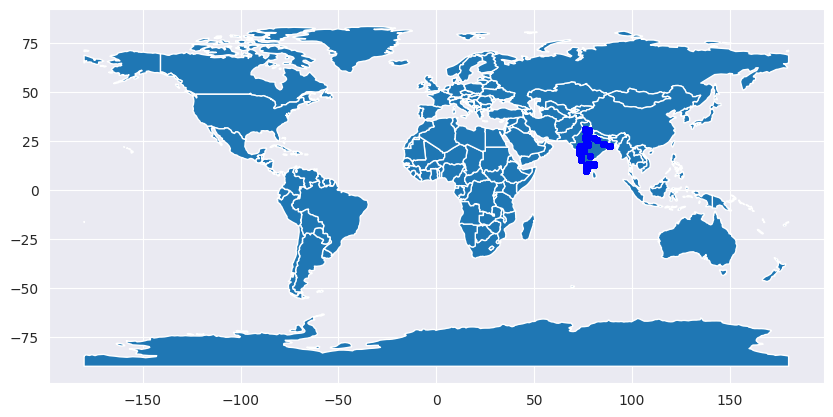

In [54]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

restaurant_geometry = [Point(xy) for xy in zip(data['Restaurant_longitude'], data['Restaurant_latitude'])]
restaurant_gdf = GeoDataFrame(data, geometry=restaurant_geometry)

delivery_geometry = [Point(xy) for xy in zip(data['Delivery_location_longitude'], data['Delivery_location_latitude'])]
delivery_gdf = GeoDataFrame(data, geometry=delivery_geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
restaurant_gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
delivery_gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='blue', markersize=15)

# Correlation

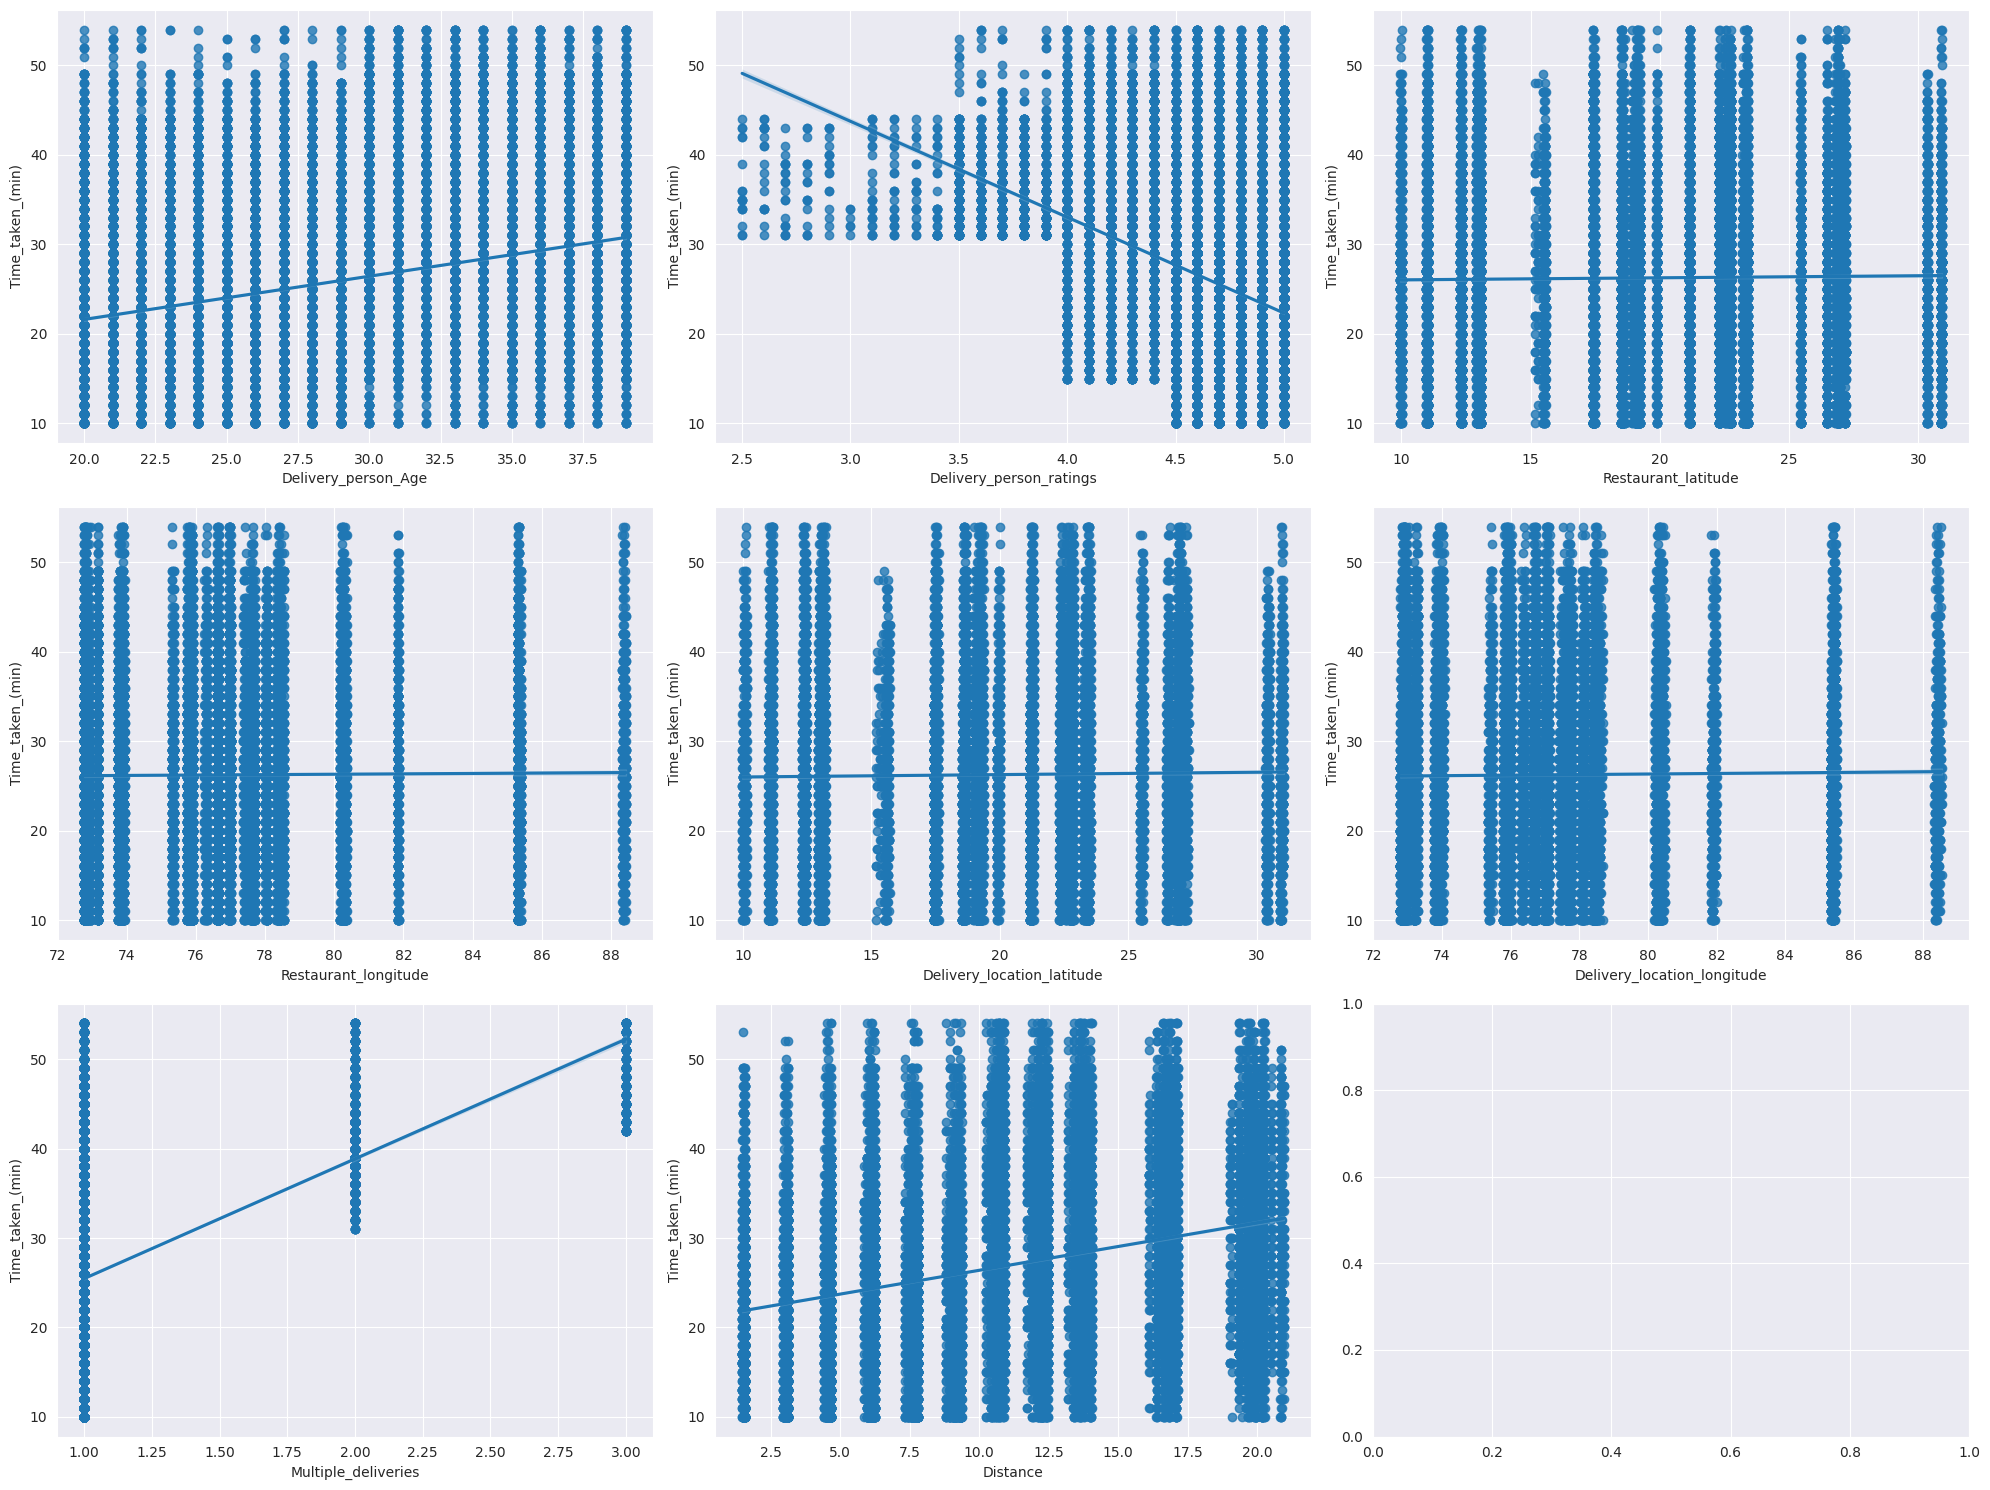

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.regplot(x=data["Delivery_person_Age"], y=data["Time_taken_(min)"], ax=axes[0,0])
sns.regplot(x=data["Delivery_person_ratings"], y=data["Time_taken_(min)"], ax=axes[0,1])
sns.regplot(x=data["Restaurant_latitude"], y=data["Time_taken_(min)"], ax=axes[0,2])
sns.regplot(x=data["Restaurant_longitude"], y=data["Time_taken_(min)"], ax=axes[1,0])
sns.regplot(x=data["Delivery_location_latitude"], y=data["Time_taken_(min)"], ax=axes[1,1])
sns.regplot(x=data["Delivery_location_longitude"], y=data["Time_taken_(min)"], ax=axes[1,2])
sns.regplot(x=data["Multiple_deliveries"], y=data["Time_taken_(min)"], ax=axes[2,0])
sns.regplot(x=data["Distance"], y=data["Time_taken_(min)"], ax=axes[2,1])
plt.tight_layout()
plt.show()

/tmp/ipykernel_18417/221951862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


Text(0.5, 1, 'Correlation of Features with Time Taken')

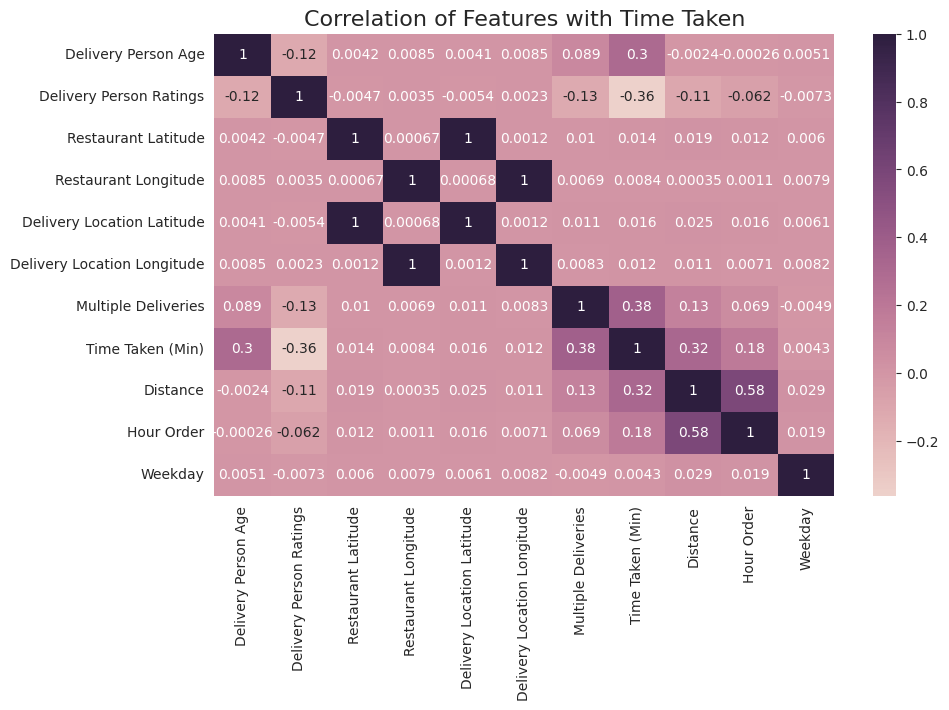

In [27]:
h_labels = [x.replace('_', ' ').title() for x in list(data.select_dtypes(include=['number']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)
plt.title('Correlation of Features with Time Taken',y=1,size=16)

In [28]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.375576
Distance                       0.320633
Delivery_person_Age            0.300388
Hour_order                     0.184651
Delivery_location_latitude     0.015657
Restaurant_latitude            0.013507
Delivery_location_longitude    0.011727
Restaurant_longitude           0.008357
WeekDay                        0.004264
Delivery_person_ratings       -0.361965
Name: Time_taken_(min), dtype: float64 



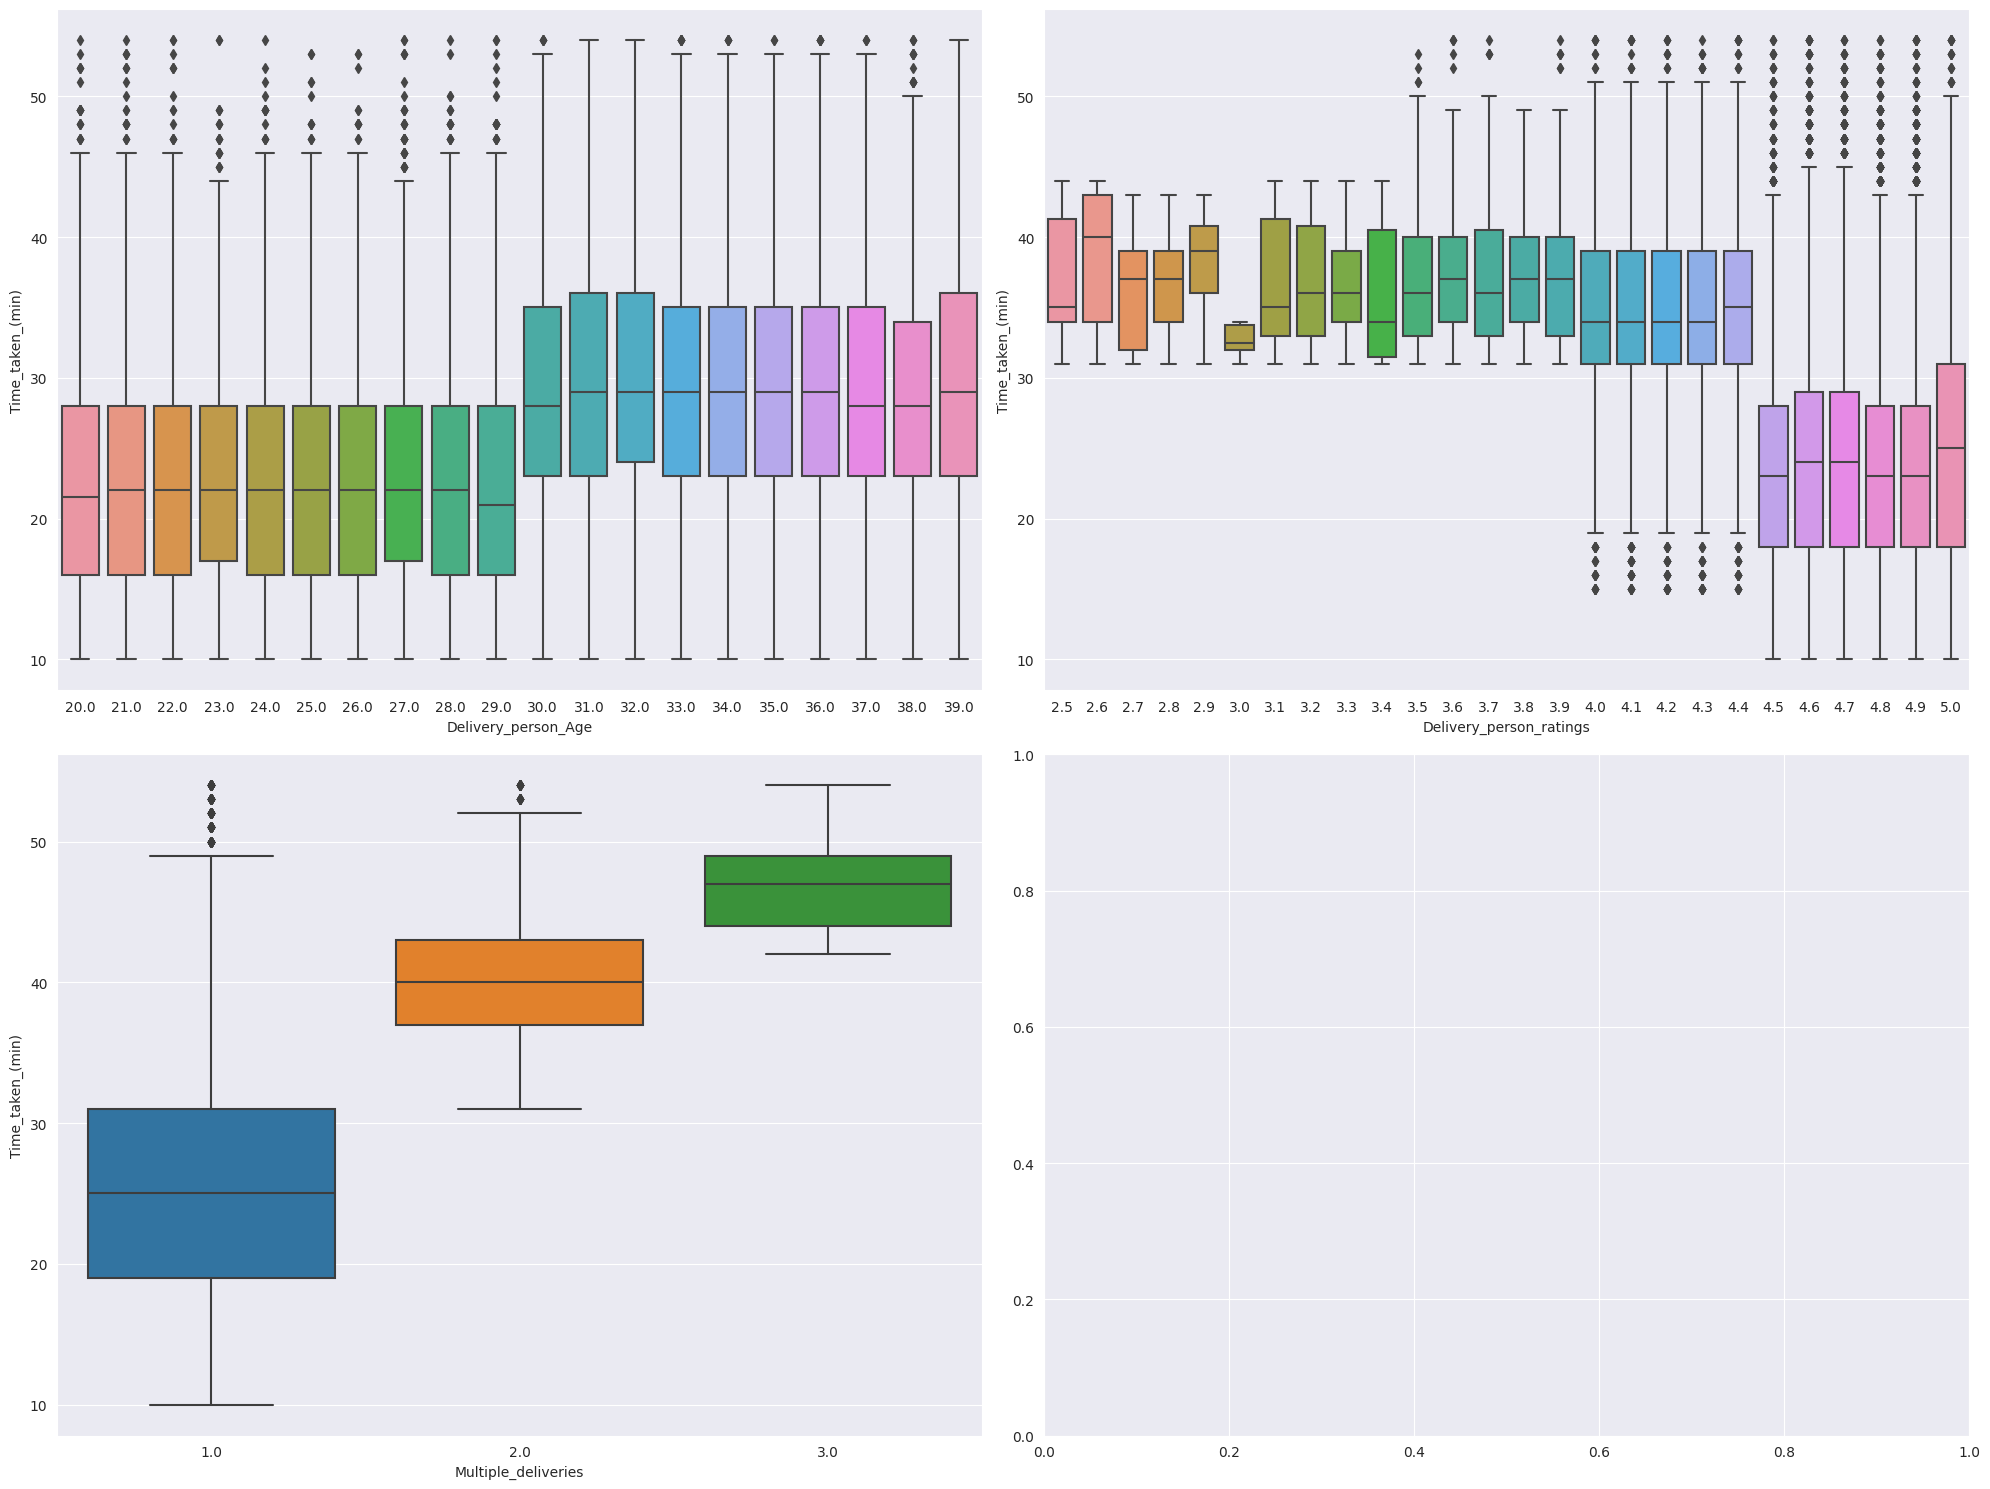

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(x="Delivery_person_Age", y="Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Delivery_person_ratings", y="Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Multiple_deliveries", y="Time_taken_(min)", data=data, ax=axes[1,0])
plt.tight_layout()
plt.show()

In [30]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Session'],
      dtype='object')

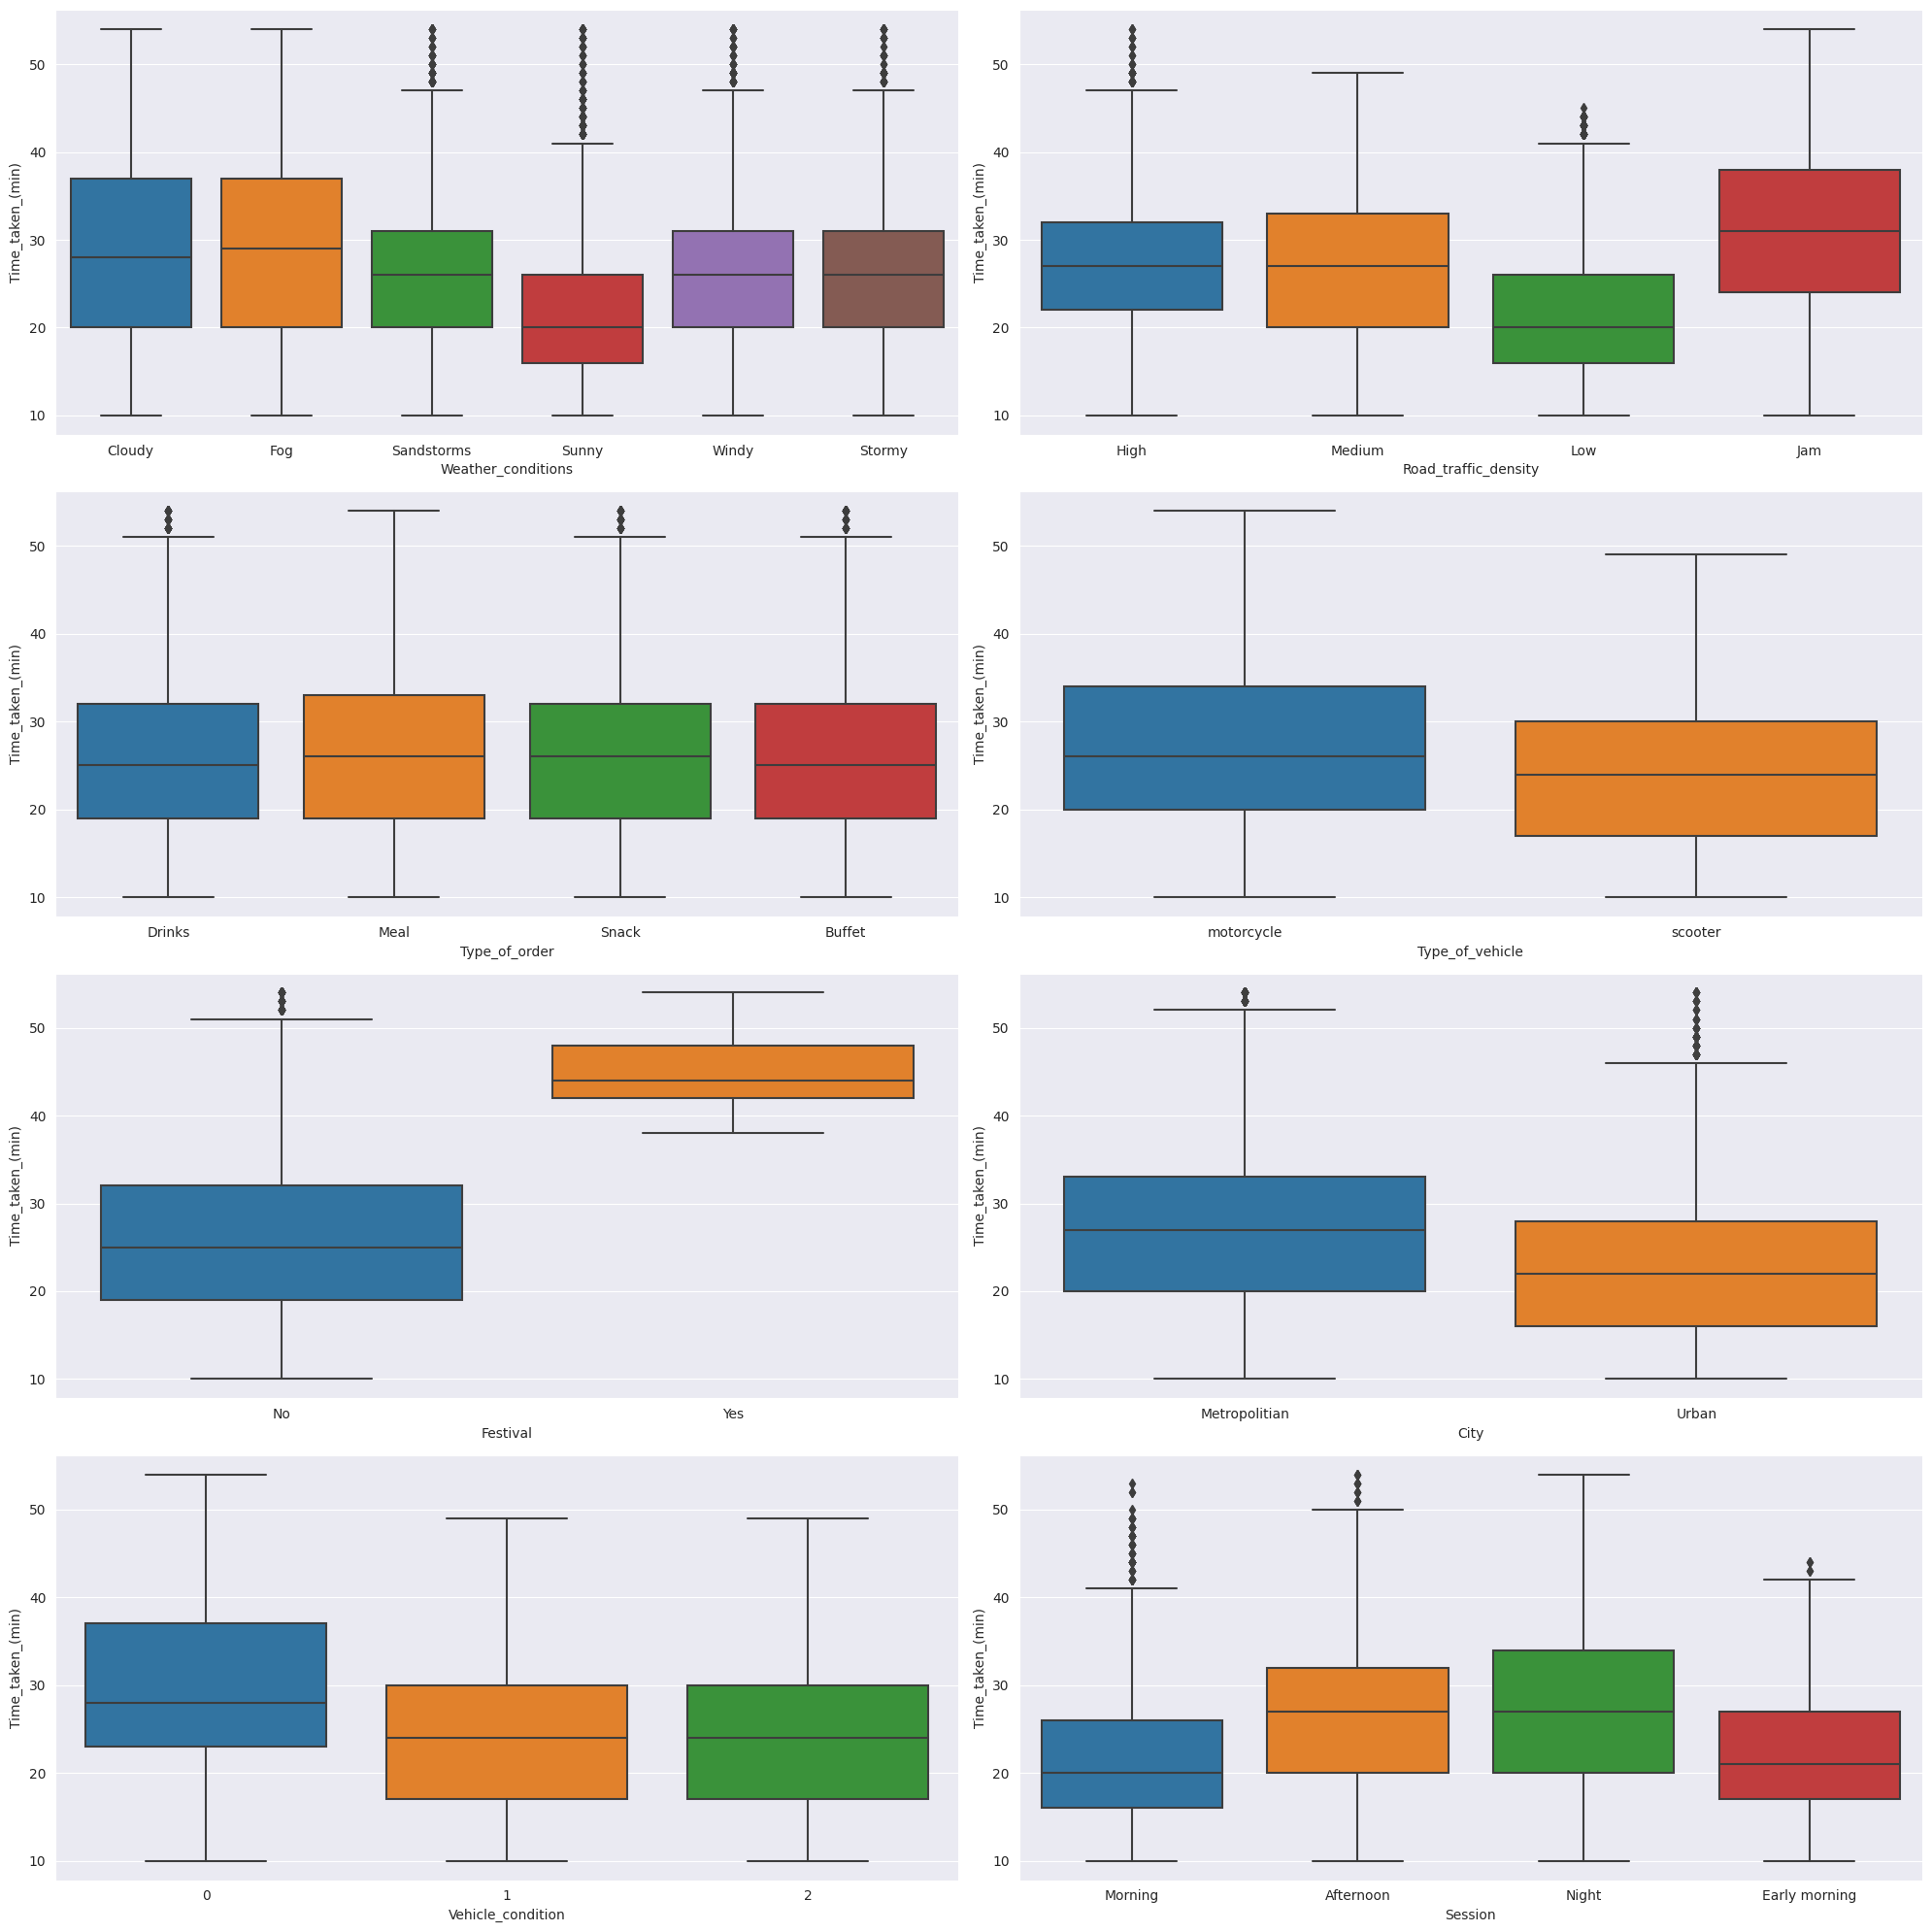

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
sns.boxplot(x="Weather_conditions", y="Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Road_traffic_density", y="Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Type_of_order", y="Time_taken_(min)", data=data, ax=axes[1,0])
sns.boxplot(x="Type_of_vehicle", y="Time_taken_(min)", data=data, ax=axes[1,1])
sns.boxplot(x="Festival", y="Time_taken_(min)", data=data, ax=axes[2,0])
sns.boxplot(x="City", y="Time_taken_(min)", data=data, ax=axes[2,1])
sns.boxplot(x="Vehicle_condition", y="Time_taken_(min)", data=data, ax=axes[3,0])
sns.boxplot(x="Session", y="Time_taken_(min)", data=data, ax=axes[3,1])
plt.tight_layout()
plt.show()

# Phân tích ANOVA

In [32]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Session'],
      dtype='object')

In [33]:
data_anova = data[["Vehicle_condition","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Vehicle_condition'])
anova_result = stats.f_oneway(grouped_anova.get_group(0)['Time_taken_(min)'],
                              grouped_anova.get_group(1)['Time_taken_(min)'],
                              grouped_anova.get_group(2)['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1662.851463477556, pvalue=0.0)

In [34]:
data_anova = data[["Festival","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Festival'])
anova_result = stats.f_oneway(grouped_anova.get_group('Yes')['Time_taken_(min)'],
                              grouped_anova.get_group('No')['Time_taken_(min)'],)
anova_result

F_onewayResult(statistic=3506.881094976628, pvalue=0.0)

In [35]:
data_anova = data[["City","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['City'])
anova_result = stats.f_oneway(grouped_anova.get_group('Urban')['Time_taken_(min)'],
                              grouped_anova.get_group('Metropolitian')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1740.0996811193713, pvalue=0.0)

In [36]:
data_anova = data[["Type_of_order","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_order'])
anova_result = stats.f_oneway(grouped_anova.get_group('Buffet')['Time_taken_(min)'],
                              grouped_anova.get_group('Snack')['Time_taken_(min)'],
                              grouped_anova.get_group('Drinks')['Time_taken_(min)'],
                              grouped_anova.get_group('Meal')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1.966271448571324, pvalue=0.11665654790642392)

In [37]:
data_anova = data[["Weather_conditions","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Weather_conditions'])
anova_result = stats.f_oneway(grouped_anova.get_group('Fog')['Time_taken_(min)'],
                              grouped_anova.get_group('Cloudy')['Time_taken_(min)'],
                              grouped_anova.get_group('Sandstorms')['Time_taken_(min)'],
                              grouped_anova.get_group('Sunny')['Time_taken_(min)'],
                              grouped_anova.get_group('Windy')['Time_taken_(min)'],
                              grouped_anova.get_group('Stormy')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=557.0115589932869, pvalue=0.0)

In [38]:
data_anova = data[["Type_of_vehicle","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_vehicle'])
anova_result = stats.f_oneway(grouped_anova.get_group('scooter')['Time_taken_(min)'],
                              grouped_anova.get_group('motorcycle')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1045.1115217356914, pvalue=2.3047596597608282e-226)

In [39]:
data_anova = data[["Road_traffic_density","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Road_traffic_density'])
anova_result = stats.f_oneway(grouped_anova.get_group('Jam')['Time_taken_(min)'],
                              grouped_anova.get_group('Medium')['Time_taken_(min)'],
                              grouped_anova.get_group('High')['Time_taken_(min)'],
                              grouped_anova.get_group('Low')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=2957.034732950129, pvalue=0.0)

In [40]:
data_anova = data[["Session","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Session'])
anova_result = stats.f_oneway(grouped_anova.get_group('Early morning')['Time_taken_(min)'],
                              grouped_anova.get_group('Morning')['Time_taken_(min)'],
                              grouped_anova.get_group('Afternoon')['Time_taken_(min)'],
                              grouped_anova.get_group('Night')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=945.716927388016, pvalue=0.0)

# Features Selection:
    * Numerical feature:
        Multiple_deliveries
        Distance
        Delivery_person_Age
    * Categorical feature:
        City
        Road_traffic_density
        Vehicle_condition